# Initial Guesses for Trajectory Optimisation

In [4]:
import sys; sys.path.append('../')

# In this example a direct trapezoidal transcription
# trajectory optimisation problem is given a guess
from Trajectory import Point_Lander
from Optimisation import Trapezoidal

In [5]:
# Instantiate a dynamical model and look at details
Model = Point_Lander()

In [6]:
# Create a trajectory optimisation problem and look at details
Problem = Trapezoidal(Model, nsegs=20)

In [18]:
# Guess from a ballistic (uncontrolled) trajectory
tf, state, control = Problem.Guess.Ballistic(tf=10, nlp=False)

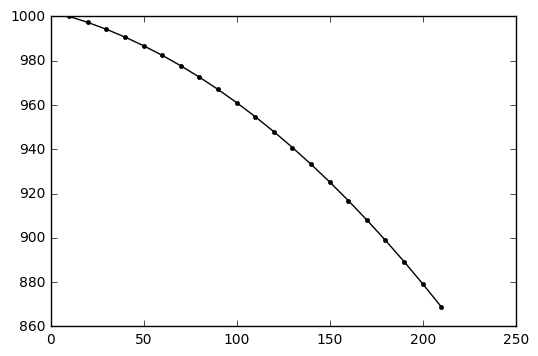

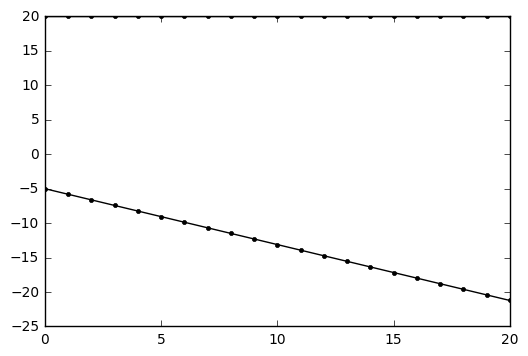

In [19]:
# Visualise the guess
import matplotlib.pyplot as plt
plt.plot(state[:,0], state[:,1], 'k.-') # Trajectory
plt.show()
plt.plot(state[:,2:4], 'k.-') # vx and vy
plt.show()

In [20]:
# Import PyGMO for optimisation
from PyGMO import *

In [21]:
# Use sequential least squares quadratic programming
algo = algorithm.scipy_slsqp(max_iter=1000, screen_output=True)

In [22]:
# Create an empty population space for individuals (decision vectors) to inhabit
pop = population(Problem)

In [23]:
# Provide a ballistic (uncontrolled) trajectory as an initial guess
zguess = Problem.Guess.Ballistic(tf=10)

In [24]:
# Add the guess to the population
pop.push_back(tuple(zguess))

In [25]:
# Evolve the individual with SLSQP
pop = algo.evolve(pop)

  NIT    FC           OBJFUN            GNORM
    1   171    -9.000000E+03     1.000000E+00
    2   343    -8.998520E+03     1.000000E+00
    3   521    -8.998520E+03     1.000000E+00
    4   696    -8.998521E+03     1.000000E+00
    5   868    -8.998578E+03     1.000000E+00
    6  1040    -8.998651E+03     1.000000E+00
    7  1220    -8.998651E+03     1.000000E+00
    8  1393    -8.998665E+03     1.000000E+00
    9  1564    -8.999050E+03     1.000000E+00
   10  1735    -8.999068E+03     1.000000E+00
   11  1907    -8.998837E+03     1.000000E+00
   12  2079    -8.998462E+03     1.000000E+00
   13  2251    -8.998024E+03     1.000000E+00
   14  2423    -8.997484E+03     1.000000E+00
   15  2595    -8.996381E+03     1.000000E+00
   16  2767    -8.993724E+03     1.000000E+00
   17  2939    -8.991872E+03     1.000000E+00
   18  3111    -8.989296E+03     1.000000E+00
   19  3283    -8.987049E+03     1.000000E+00
   20  3455    -8.985241E+03     1.000000E+00
   21  3627    -8.983829E+03     1

In [26]:
tf, s, c = Problem.Decode(pop.champion.x)

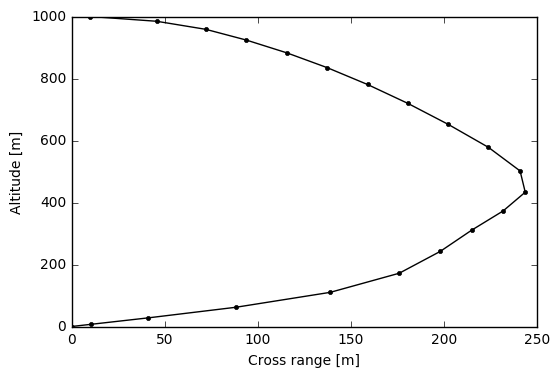

In [41]:
# x vs. y
plt.plot(s[:,0], s[:,1], 'k.-'); plt.xlabel('Cross range [m]'); plt.ylabel('Altitude [m]')
plt.show()

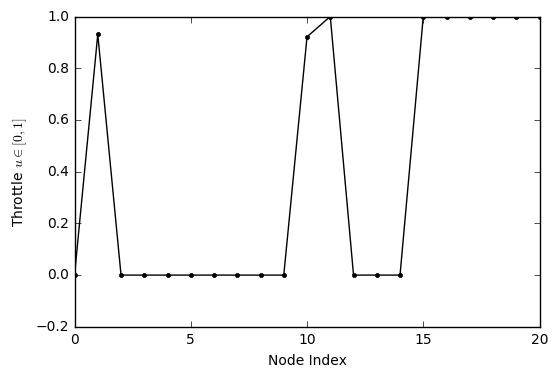

In [55]:
# Controls (note the bang-off-bang profile indicative of mass optimal control)
plt.plot(c[:,0], 'k.-'); plt.ylabel('Throttle $u \in [0,1]$'), plt.xlabel('Node Index')
plt.show()

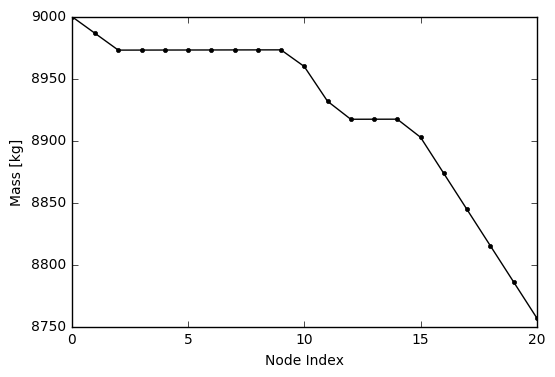

In [43]:
# Plot the propellent usage
plt.plot(s[:,4],'k.-'); plt.ylabel('Mass [kg]'); plt.xlabel('Node Index')
plt.show()

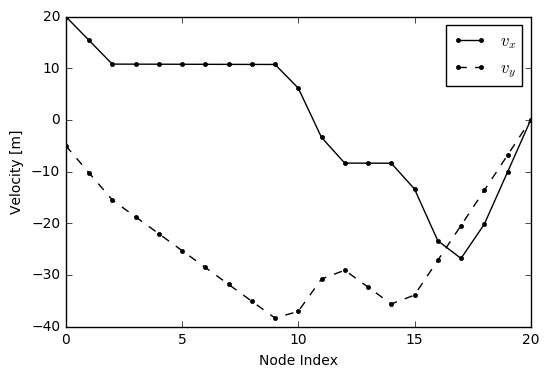

In [56]:
# Soft landing
plt.plot(s[:,2], 'k.-')
plt.plot(s[:,3], 'k.--')
plt.legend(['$v_x$', '$v_y$'])
plt.xlabel('Node Index')
plt.ylabel('Velocity [m]')
plt.show()